## Red neuronal recurrente

Redes neuronales artificiales que retienen estados pasados en información secuencial, sea con la simple reutilización de la salida inmediatament anterior o a través de sistemas de memoria mas complejos. La información puede ser secuencial por motivos temporales, como series de precios, o estructurales como el texto. 

![Modelo de red recurrente](https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png)

Fuente: [medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [35]:
data = google = pd.read_csv("./GOOGL_2006-01-01_to_2018-01-01.csv",
                            index_col='Date', parse_dates=['Date']).drop("Name", axis=1)
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450
2006-01-04,222.17,224.70,220.09,222.84,15292353
2006-01-05,223.22,226.00,220.97,225.85,10815661
2006-01-06,228.66,235.49,226.85,233.06,17759521
2006-01-09,233.44,236.94,230.70,233.68,12795837
2006-01-10,232.44,235.36,231.25,235.11,9104719
2006-01-11,235.87,237.79,234.82,236.05,9008664
2006-01-12,237.10,237.73,230.98,232.05,10125212
2006-01-13,232.39,233.68,231.04,233.36,7660220


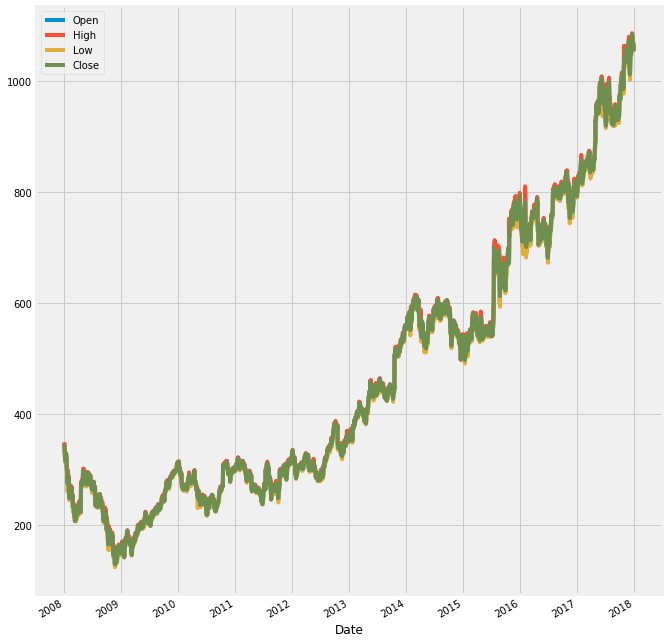

In [36]:
data['2008':'2018'].drop("Volume", axis=1).plot(figsize=(10,12)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000125ABE4A5C0>,
      dtype=object)

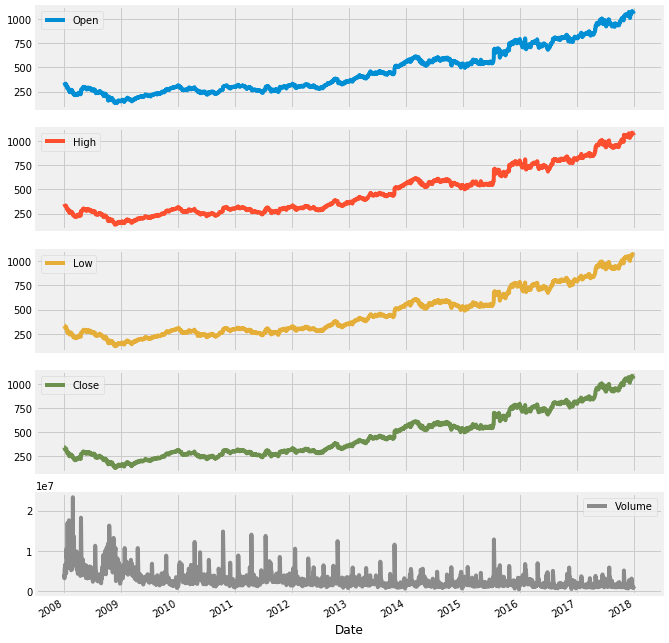

In [37]:
data['2008':'2018'].plot(subplots=True, figsize=(10,12))

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
historia = 60

In [39]:
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(historia, data.shape[1])))
model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 60, 50)            2800      
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 7,901
Trainable params: 7,901
Non-trainable params: 0
_________________________________________________________________


In [7]:
data.shape

(3019, 5)

In [40]:
from keras.preprocessing.sequence import TimeseriesGenerator
generador = TimeseriesGenerator(data.values[:-1], data.Close.values[1:], length=historia)
x, y = generador[0]
x.shape, y.shape

((128, 60, 5), (128,))

In [41]:
train = slice("2010", "2016")
test = slice("2017", "2018")
data.loc[train].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.79,315.07,312.43,313.69,1957963
2010-01-05,313.90,314.23,311.08,312.31,3007857
2010-01-06,313.24,313.24,303.48,304.43,3980628
2010-01-07,305.00,305.30,296.62,297.35,6418020
2010-01-08,296.30,301.93,294.85,301.31,4724735


In [42]:
data.loc[test].head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,800.62,811.44,796.89,808.01,1959033
2017-01-04,809.89,813.43,804.11,807.77,1515339
2017-01-05,807.50,813.74,805.92,813.02,1340535
2017-01-06,814.99,828.96,811.50,825.21,2017097
2017-01-09,826.37,830.43,821.62,827.18,1408924


In [43]:
train_generator = TimeseriesGenerator(data.loc[train].values[:-1], data.loc[train].Close.values[1:], length=historia)

In [44]:
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=3, verbose=1)

Epoch 1/3
14/14 [==============================] - 6s 416ms/step - loss: 269809.4178
Epoch 2/3
14/14 [==============================] - 1s 65ms/step - loss: 266814.3077 0s - loss:
Epoch 3/3
14/14 [==============================] - 1s 65ms/step - loss: 265551.0603


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data.loc[train])
scaled_train = scaler.transform(data.loc[train])
scaled_test = scaler.transform(data.loc[test])

train_generator = TimeseriesGenerator(scaled_train[:-1], scaled_train[1:, 3], length=historia, shuffle=True)
test_generator = TimeseriesGenerator(scaled_test[:-1], scaled_test[1:, 3], length=historia)

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(historia, data.shape[1])))
model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mean_squared_error')
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=10, verbose=1)

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Epoch 1/10
14/14 [==============================] - 2s 164ms/step - loss: 0.2927
Epoch 2/10
14/14 [==============================] - 1s 74ms/step - loss: 0.1040
Epoch 3/10
14/14 [==============================] - 1s 68ms/step - loss: 0.0784
Epoch 4/10
14/14 [==============================] - 1s 74ms/step - loss: 0.0562
Epoch 5/10
14/14 [==============================] - 1s 75ms/step - loss: 0.0491
Epoch 6/10
14/14 [==============================] - 1s 80ms/step - loss: 0.0316
Epoch 7/10
14/14 [==============================] - 1s 79ms/step - loss: 0.0280
Epoch 8/10
14/14 [==============================] - 1s 83ms/step - loss: 0.0223
Epoch 9/10
14/14 [==============================] - 1s 83ms/step - loss: 0.0201
Epoch 10/10
14/14 [==============================] - 1s 86ms/step - loss: 0.0153


In [53]:
model.evaluate_generator(test_generator, steps=len(test_generator))

0.0028702242692050183

In [54]:
def getPreds(model, test_generator):
    preds = []
    smin = scaler.data_min_[3]
    smax = scaler.data_max_[3]
    def scale(x, m, M):
        return m + x * (M - m)

    for batch in range(len(test_generator)):
        X, real = test_generator[batch]
        pred = model.predict(X)[:, 0]
        pred = [(scale(p, smin, smax), scale(r, smin, smax)) for p, r in zip(pred, real)]
        pred = pd.DataFrame(pred, columns=["pred", "real"])
        preds.append(pred)
    return pd.concat(preds).reset_index(drop=True)


,pred,real
0,888.551370,847.80
1,895.653977,856.75
2,903.164314,852.57
3,904.955627,848.91
4,904.885917,845.10
5,905.687536,842.10
6,904.849333,841.70
7,899.439621,839.88
8,899.440209,841.46
9,892.372640,840.18


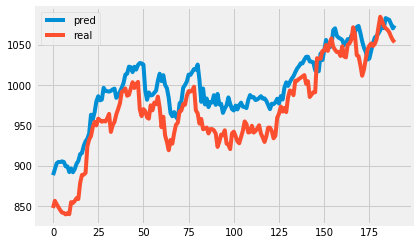

In [55]:
preds = getPreds(model, test_generator)
preds.plot()
preds

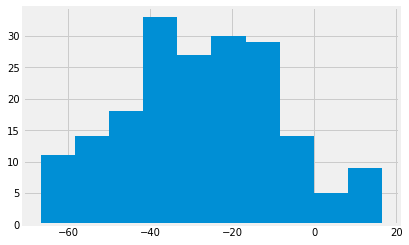

In [56]:
(preds.real - preds.pred).hist()

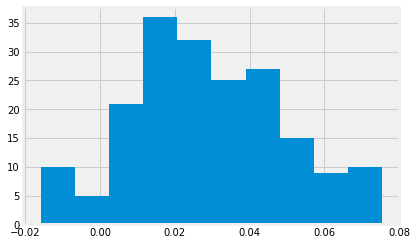

In [57]:
(preds.pred / preds.real - 1).hist()

Epoch 1/5
14/14 [==============================] - 1s 65ms/step - loss: 0.0137
Epoch 2/5
14/14 [==============================] - 1s 77ms/step - loss: 0.0110
Epoch 3/5
14/14 [==============================] - 1s 75ms/step - loss: 0.0099
Epoch 4/5
14/14 [==============================] - 1s 76ms/step - loss: 0.0099
Epoch 5/5
14/14 [==============================] - 1s 75ms/step - loss: 0.0080


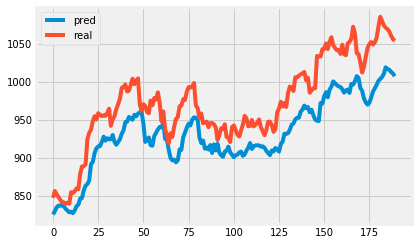

In [58]:
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=5, verbose=1)
preds = getPreds(model, test_generator)
preds.plot()

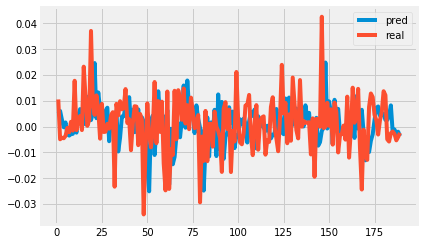

In [64]:
preds.pct_change().iloc[1:].plot()

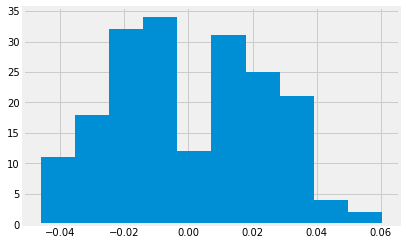

In [33]:
(preds.pred / preds.real - 1).hist()

Epoch 1/15
14/14 [==============================] - 3s 184ms/step - loss: 0.0314
Epoch 2/15
14/14 [==============================] - 1s 67ms/step - loss: 0.0074
Epoch 3/15
14/14 [==============================] - 1s 68ms/step - loss: 0.0068
Epoch 4/15
14/14 [==============================] - 1s 68ms/step - loss: 0.0059
Epoch 5/15
14/14 [==============================] - 1s 80ms/step - loss: 0.0048
Epoch 6/15
14/14 [==============================] - 1s 73ms/step - loss: 0.0035
Epoch 7/15
14/14 [==============================] - 1s 78ms/step - loss: 0.0035
Epoch 8/15
14/14 [==============================] - 1s 72ms/step - loss: 0.0030
Epoch 9/15
14/14 [==============================] - 1s 72ms/step - loss: 0.0033
Epoch 10/15
14/14 [==============================] - 1s 76ms/step - loss: 0.0031
Epoch 11/15
14/14 [==============================] - 1s 69ms/step - loss: 0.0029
Epoch 12/15
14/14 [==============================] - 1s 74ms/step - loss: 0.0028
Epoch 13/15
14/14 [=================

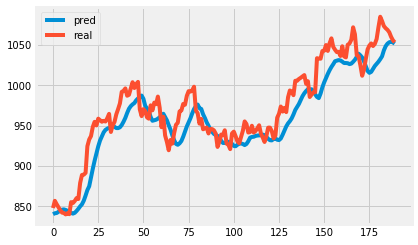

In [65]:
model = Sequential()
model.add(LSTM(50, input_shape=(historia, data.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',loss='mean_squared_error')
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=15, verbose=1)
preds = getPreds(model, test_generator)
preds.plot()

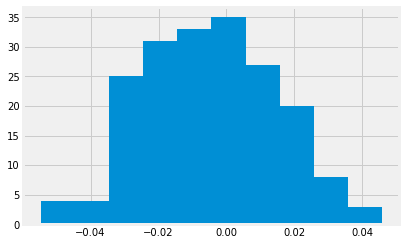

In [22]:
(preds.pred / preds.real - 1).hist()

In [23]:
(preds.pred / preds.real - 1).abs().mean()

0.01657317282713848

In [73]:
from keras import optimizers

model = Sequential()
model.add(LSTM(50, input_shape=(historia, data.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.compile(optimizer=optimizers.Adagrad(lr=0.001), loss='mean_absolute_percentage_error')

Epoch 1/15
14/14 [==============================] - 3s 219ms/step - loss: 22227.7790 - val_loss: 77.0184
Epoch 2/15
14/14 [==============================] - 1s 61ms/step - loss: 69.5060 - val_loss: 74.8679
Epoch 3/15
14/14 [==============================] - 1s 61ms/step - loss: 32470.4856 - val_loss: 77.5554
Epoch 4/15
14/14 [==============================] - 1s 62ms/step - loss: 3781.5428 - val_loss: 77.0988
Epoch 5/15
14/14 [==============================] - 1s 61ms/step - loss: 1190.1033 - val_loss: 76.3131
Epoch 6/15
14/14 [==============================] - 1s 66ms/step - loss: 28151.3084 - val_loss: 77.9886
Epoch 7/15
14/14 [==============================] - 1s 61ms/step - loss: 2318.3384 - val_loss: 78.5345
Epoch 8/15
14/14 [==============================] - 1s 68ms/step - loss: 77.7310 - val_loss: 78.4864
Epoch 9/15
14/14 [==============================] - 1s 60ms/step - loss: 8597.5895 - val_loss: 78.4801
Epoch 10/15
14/14 [==============================] - 1s 64ms/step - loss:

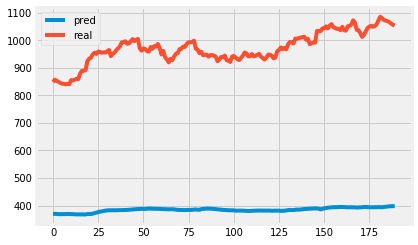

In [74]:
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=15, verbose=1,
                   validation_data=test_generator, validation_steps=len(test_generator))
preds = getPreds(model, test_generator)
preds.plot()

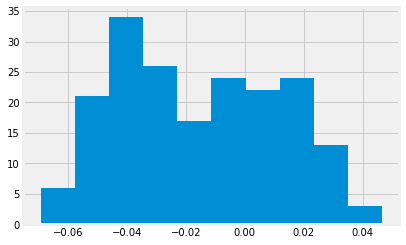

In [26]:
(preds.pred / preds.real - 1).hist()

In [27]:
(preds.pred / preds.real - 1).abs().mean()

0.02629397624080483